<a href="https://colab.research.google.com/github/Yohanes213/Hamoye/blob/main/Hamoye_Machine_Learning_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
df= pd.read_excel('ENB2012_data.xlsx')

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.shape

(768, 10)

In [6]:
simple_df= df[['X1', 'Y2']].sample(15, random_state=2)

In [7]:
simple_df.shape

(15, 2)

<Axes: xlabel='X1', ylabel='Y2'>

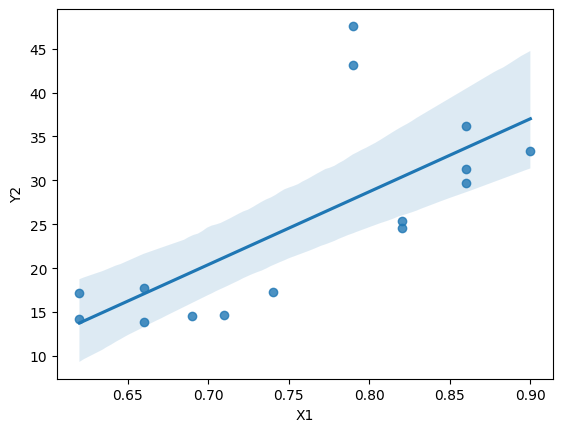

In [8]:
sns.regplot(x='X1', y='Y2', data=simple_df)

<Axes: xlabel='X1', ylabel='Y2'>

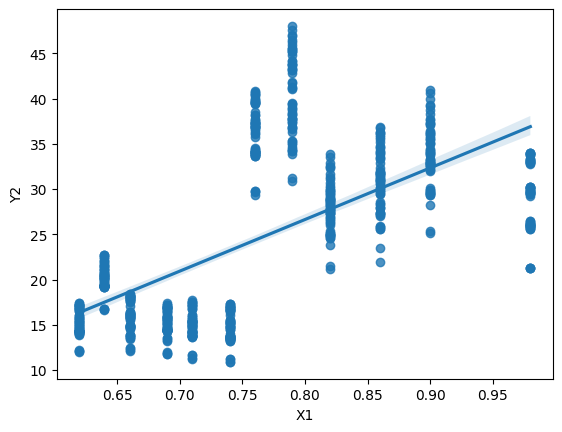

In [9]:
sns.regplot(x='X1', y='Y2', data=df)

<Axes: >

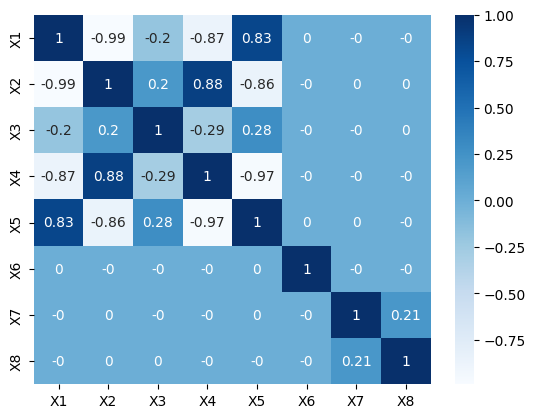

In [10]:
corr = round(df.drop(columns=['Y1','Y2']).corr() , 2)
sns.heatmap(corr, cmap='Blues', annot=True)

In [11]:
X = df.drop(columns=['Y1','Y2'])
y = df[['Y1','Y2']]

In [12]:
linear = LinearRegression()
model = linear.fit(X,y)

In [13]:
model.score(X,y)

0.9020271533385962

In [14]:
y_pred = model.predict(X)

In [15]:
type(y)

pandas.core.frame.DataFrame

In [16]:
y_pred = pd.DataFrame(y_pred)

In [17]:
y_pred.head()

,0,1
0,22.649445,25.828708
1,22.626387,25.950587
2,22.603330,26.072467
3,22.580273,26.194346
4,25.040939,28.268375


In [18]:
y.head()

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [19]:
pred_df = pd.DataFrame({'True Value':y['Y1'] , 'Predicted Value':round(y_pred[0],2)})

In [20]:
pred_df.head()

,True Value,Predicted Value
0,15.55,22.65
1,15.55,22.63
2,15.55,22.60
3,15.55,22.58
4,20.84,25.04


<Axes: xlabel='True Value', ylabel='Predicted Value'>

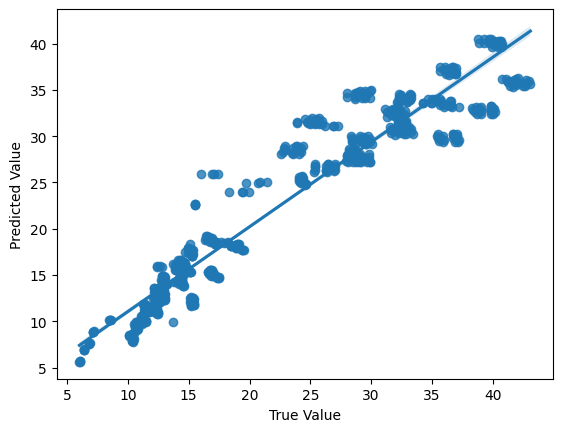

In [21]:
sns.regplot(x= 'True Value', y='Predicted Value', data=pred_df)

<Axes: xlabel='Y2', ylabel='1'>

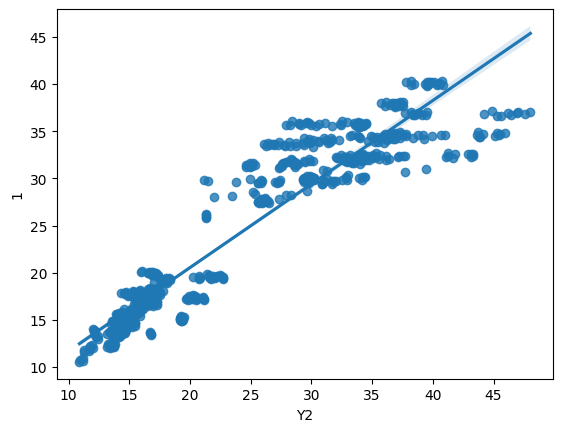

In [22]:
sns.regplot(x= y['Y2'], y= y_pred[1])

In [23]:
res = y['Y1']-y_pred[0]

<Axes: xlabel='0'>

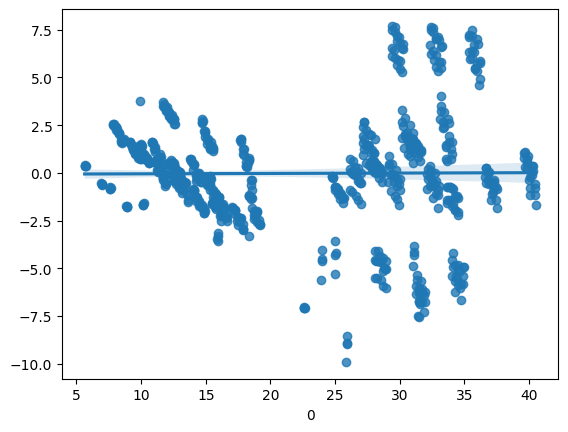

In [24]:
sns.regplot(x= y_pred[0], y= res)

<Axes: ylabel='Count'>

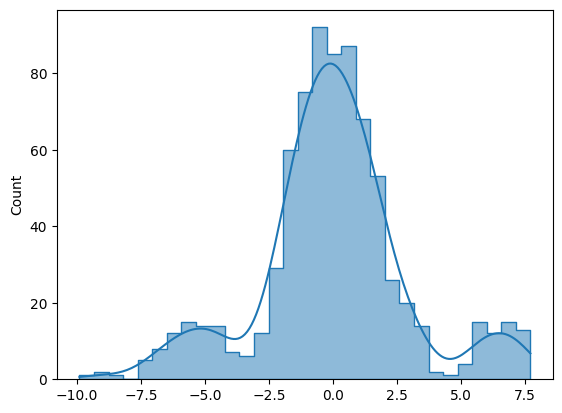

In [25]:
sns.histplot(res, kde=True, element='step')

In [26]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
'X6': 'Orientation', 'X7': 'Glazing_Area',
'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}


In [27]:
df = df.rename(columns=column_names)

In [28]:
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()

norm_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [31]:
norm_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,1.000000,0.000000,0.285714,0.000000,1.0,0.000000,0.0,0.0,0.257212,0.280905
1,1.000000,0.000000,0.285714,0.000000,1.0,0.333333,0.0,0.0,0.257212,0.280905
2,1.000000,0.000000,0.285714,0.000000,1.0,0.666667,0.0,0.0,0.257212,0.280905
3,1.000000,0.000000,0.285714,0.000000,1.0,1.000000,0.0,0.0,0.257212,0.280905
4,0.777778,0.166667,0.428571,0.111111,1.0,0.000000,0.0,0.0,0.399838,0.468085


In [32]:
X =  norm_df.drop(columns=['Heating_Load', 'Cooling_Load'])
y = norm_df['Heating_Load']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
linear_model = LinearRegression()

In [35]:
linear_model.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = linear_model.predict(x_test)

In [37]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
round(mae, 3)

0.063

In [38]:
import numpy as np
rss = np.sum(np.square(y_test - y_pred))
round(rss, 3) 

1.821

In [49]:
from sklearn.metrics import r2_score
r2_score1 = r2_score(y_test, y_pred)
round(r2_score1, 3)

0.894

In [40]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)


Ridge(alpha=0.5)

In [50]:
y_pred = ridge_reg.predict(x_test)

In [53]:
round(r2_score(y_test,y_pred), 3)

0.892

In [54]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [56]:
lasso_reg.coef_

array([-0.02771852,  0.        ,  0.20008735, -0.        ,  0.46348204,
        0.        ,  0.20613161,  0.02143086])

In [71]:
def get_weights_df(model, feat, col_name):
  weights = pd.Series(model.coef_, feat.columns).sort_values()
  weight_df = pd.DataFrame(weights).reset_index()
  weight_df.columns = ['Features', col_name]
  weight_df[col_name].round(3)
  return weight_df

In [72]:
linear_model_weights = get_weights_df(linear_model, x_train,'Linear Model Weights')
ridge_model_weights = get_weights_df(ridge_reg, x_train,'Ridge Model Weights')
lasso_model_weights = get_weights_df(lasso_reg, x_train,'Lasso Model Weights')

In [73]:
lasso_model_weights

,Features,Lasso Model Weights
0,Relative_Compactness,-0.027719
1,Surface_Area,0.000000
2,Roof_Area,-0.000000
3,Orientation,0.000000
4,Glazing_Area_Distribution,0.021431
5,Wall_Area,0.200087
6,Glazing_Area,0.206132
7,Overall_Height,0.463482


In [76]:
final_weights = pd.merge(linear_model_weights, ridge_model_weights , on='Features')
final_weights = pd.merge(final_weights, lasso_model_weights , on='Features')

In [77]:
final_weights

,Features,Linear Model Weights,Ridge Model Weights,Lasso Model Weights
0,Surface_Area,-5.966585e+12,-0.062275,0.000000
1,Relative_Compactness,-6.064125e-01,-0.283471,-0.027719
2,Orientation,-3.150940e-03,0.003369,0.000000
3,Glazing_Area_Distribution,1.922846e-02,0.029088,0.021431
4,Glazing_Area,2.289743e-01,0.212449,0.206132
5,Overall_Height,3.862305e-01,0.442467,0.463482
6,Wall_Area,3.480508e+12,0.103061,0.200087
7,Roof_Area,4.474939e+12,-0.163192,-0.000000
